In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

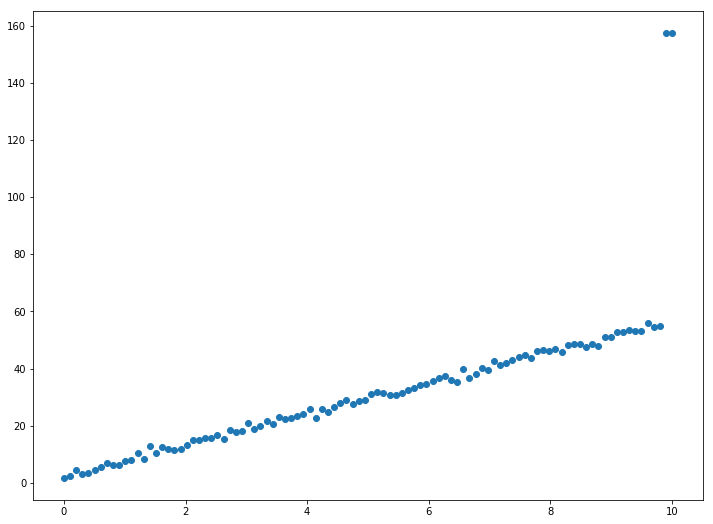

In [14]:
#Simulate Data

N = 100

x = np.linspace(0,10,N)

PHI = np.vstack((np.array([1]*N), x)).T
w_true = np.array([2.7, 5.4])


y = PHI.dot(w_true) + np.random.randn(N)

#Manufactured outliers
y[-1] += 100
y[-2] += 100

plt.figure(figsize = (12,9))
plt.scatter(x,y)


In [17]:
#Fit the model

lmbda = 400

w = np.linalg.solve(PHI.T.dot(PHI), PHI.T.dot(y)) #Without the L2 regularisation
w_l2 = np.linalg.solve(PHI.T.dot(PHI) + lmbda*np.identity(2), PHI.T.dot(y))  #With the L2 regularisation

y_hat = PHI.dot(w)
y_hat_l2 = PHI.dot(w_l2)

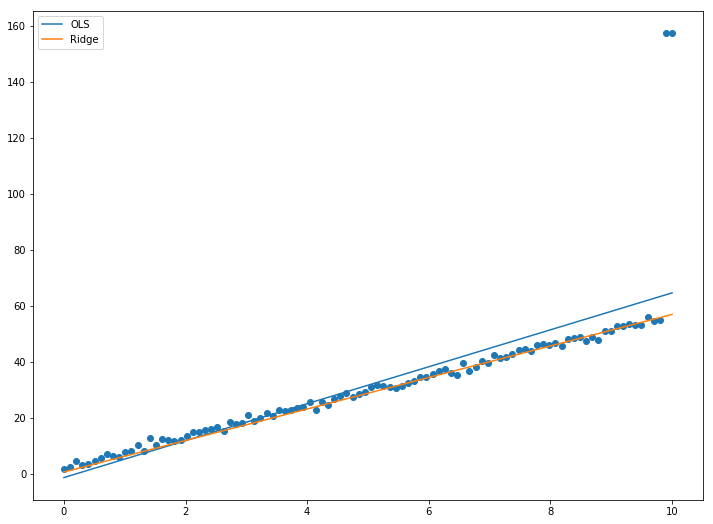

In [18]:
#Visualise the different fits

plt.figure(figsize = (12, 9))
plt.scatter(x,y)
plt.plot(x, y_hat, label = "OLS")
plt.plot(x, y_hat_l2, label = "Ridge")
plt.legend()

In [19]:
#Report the R-sqaured value

R2 = 1 - np.sum((y - y_hat)**2) / np.sum((y- y.mean())**2)
R2_l2 = 1 - np.sum((y - y_hat_l2)**2) / np.sum((y- y.mean())**2)

print ("OLS R-squared: {}".format(R2))
print("Ridge R-sqaured: {}".format(R2_l2))

OLS R-squared: 0.661959654971802
Ridge R-sqaured: 0.6331002433759856


In [ ]:
#Rige does worse because it is increase the error between the line and the outliers, hence our model is doing "worse". OLS always tries to minimise this error but sometimes sacrifing the general trend
